In [71]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<img src="http://drive.google.com/uc?export=view&id=1zJjN-vEjutF__7wpEq5Yibxv9BRZeC74"
     alt="HCA Logo" height="150" width="150"
     style="float: left; margin-right: 10px;">

|Name  | Value |
| :- |:-------------: |
| **Notebook:**  | **HotChili Trader Tear Sheet** |
| **Version:**  | 1.0.1c |
| **Date:**  | 2020-08-06  |
| **Copyright:**  | @2019-2020 |
| **Company:**  | **HotChili Analytics, LLC** |
| **Author   :**  | Alan Coppola|(ajjcoppola@hotchilianalytics.com) |
| **Author   :**  | Jeff Coppola|(jeff@hotchilianalytics.com) |

In [72]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')
### %pylab inline
###figsize(12, 12)

In [73]:
pd.set_option("max_colwidth", 400)
pd.set_option("display.max_rows", 100000)
pd.set_option("display.max_columns", 1000)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:20,.2f}'.format

In [74]:
# Parameters for location of zipline-broker run
nb_dir = "/home/hca-blog/hca/hca-live-rel/nb/" 
ans_pkl = "HCA_AllWeatherOptimizeVolatility.pkl"
ans_data_file = nb_dir + ans_pkl

# Read in backtest results for analysis
perf=pd.read_pickle(ans_data_file)

In [75]:
perf.columns
#dir(perf)

Index(['SPY', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'returns', 'sharpe', 'short_exposure', 'short_value',
       'shorts_count', 'sortino', 'starting_cash', 'starting_exposure',
       'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')

In [76]:
perf.shape

(657, 38)

In [77]:
import pandas as pd
returns, positions, transactions= pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [78]:
positions

sid,Equity(7202 [IEF]),Equity(13247 [SPY]),cash
index,,,
2018-01-03 00:00:00+00:00,"5,661,066.18","3,365,728.68","968,625.55"
2018-01-04 00:00:00+00:00,"5,658,378.88","3,379,914.84","968,625.55"
2018-01-05 00:00:00+00:00,"5,651,391.90","3,402,438.48","968,625.55"
2018-01-08 00:00:00+00:00,"5,648,704.60","3,408,660.48","968,625.55"
2018-01-09 00:00:00+00:00,"5,621,831.60","3,416,375.76","968,625.55"
2018-01-10 00:00:00+00:00,"5,620,219.22","3,411,149.28","968,625.55"
2018-01-11 00:00:00+00:00,"5,623,981.44","3,436,037.28","968,625.55"
2018-01-12 00:00:00+00:00,"5,620,219.22","3,458,436.48","968,625.55"
2018-01-16 00:00:00+00:00,"5,622,906.52","3,446,614.68","968,625.55"


In [79]:
transactions

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars
2018-01-03 21:00:00+00:00,12444,None,2018-01-03 21:00:00+00:00,f68a8ab795c74e4ab1149641a7aeb29a,270.61,Equity(13247 [SPY]),Equity(13247 [SPY]),"-3,367,411.54"
2018-01-03 21:00:00+00:00,53746,None,2018-01-03 21:00:00+00:00,34674c4821d0469cadf4561fd4a486f6,105.38,Equity(7202 [IEF]),Equity(7202 [IEF]),"-5,663,896.71"
2018-02-02 21:00:00+00:00,-1697,None,2018-02-02 21:00:00+00:00,031cead3cf3d46fbad966db100f8dc8e,275.31,Equity(13247 [SPY]),Equity(13247 [SPY]),"467,204.93"
2018-02-02 21:00:00+00:00,4446,None,2018-02-02 21:00:00+00:00,ce1871c77a2a41719ab21fc867ae7da1,102.27,Equity(7202 [IEF]),Equity(7202 [IEF]),"-454,697.36"
2018-03-02 21:00:00+00:00,-4033,None,2018-03-02 21:00:00+00:00,c67d345cddd64e208c2995b4fac56bb0,268.95,Equity(13247 [SPY]),Equity(13247 [SPY]),"1,084,657.04"
2018-03-02 21:00:00+00:00,10690,None,2018-03-02 21:00:00+00:00,e5df81aaa2cf485bb39c1958bf8fd101,102.12,Equity(7202 [IEF]),Equity(7202 [IEF]),"-1,091,673.86"
2018-04-03 20:00:00+00:00,-592,None,2018-04-03 20:00:00+00:00,734f3b9b51b547018e6bdd4d2f84425f,260.64,Equity(13247 [SPY]),Equity(13247 [SPY]),"154,298.06"
2018-04-03 20:00:00+00:00,1744,None,2018-04-03 20:00:00+00:00,cf5313901e3c4d6d9b81182d5ca39d75,102.84,Equity(7202 [IEF]),Equity(7202 [IEF]),"-179,355.39"
2018-05-02 20:00:00+00:00,-473,None,2018-05-02 20:00:00+00:00,8ec53e95c8094251b5340d9409ae44d5,263.07,Equity(13247 [SPY]),Equity(13247 [SPY]),"124,431.35"
2018-05-02 20:00:00+00:00,1456,None,2018-05-02 20:00:00+00:00,2bce9bab47894ed8aebd85f232c32bc5,101.42,Equity(7202 [IEF]),Equity(7202 [IEF]),"-147,668.52"


In [80]:
import sys

print("Tear Sheet File : {}".format(ans_data_file))
print("-----------------------------------")
print("Python version={}".format(sys.version))
print("Matplotlib version={}".format(mp.__version__))
print("Numpy version={}".format(np.version.version))


Tear Sheet File : /home/hca-blog/hca/hca-live-rel/nb/HCA_AllWeatherOptimizeVolatility.pkl
-----------------------------------
Python version=3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 09:07:38) 
[GCC 7.3.0]
Matplotlib version=3.0.3
Numpy version=1.14.1


In [81]:
#pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

In [82]:
#returns.plot()

In [83]:
#transactions

In [84]:
#from datetime import datetime
#import pytz
#start = datetime(2017, 2, 11, 0, 0, 0, 0, pytz.utc)
#end = datetime(2019, 3, 14, 0, 0, 0, 0, pytz.utc)
#s=pd.Timestamp(start)

In [85]:
#pf.create_position_tear_sheet(returns=returns,positions=positions)
#pf.plot_perf_stats(returns= returns, factor_returns=returns)

In [86]:
sim_start=perf.index[0]
sim_end= perf.index[-1]
print("start={}  end={}".format(sim_start,sim_end))


start=2018-01-02 00:00:00+00:00  end=2020-08-10 00:00:00+00:00


Start date,2018-01-02
End date,2020-08-10
Total months,31
,Backtest
Annual return,6.9%
Cumulative returns,18.9%
Annual volatility,4.7%
Sharpe ratio,1.45
Calmar ratio,0.94
Stability,0.92
Max drawdown,-7.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.30,2020-02-20,2020-03-18,2020-05-27,70
1,3.90,2018-01-26,2018-02-08,2018-08-27,152
2,3.05,2018-08-31,2018-10-29,2019-01-30,109
3,1.62,2019-09-04,2019-09-13,2019-10-04,23
4,0.89,2019-10-04,2019-10-11,2019-10-31,20


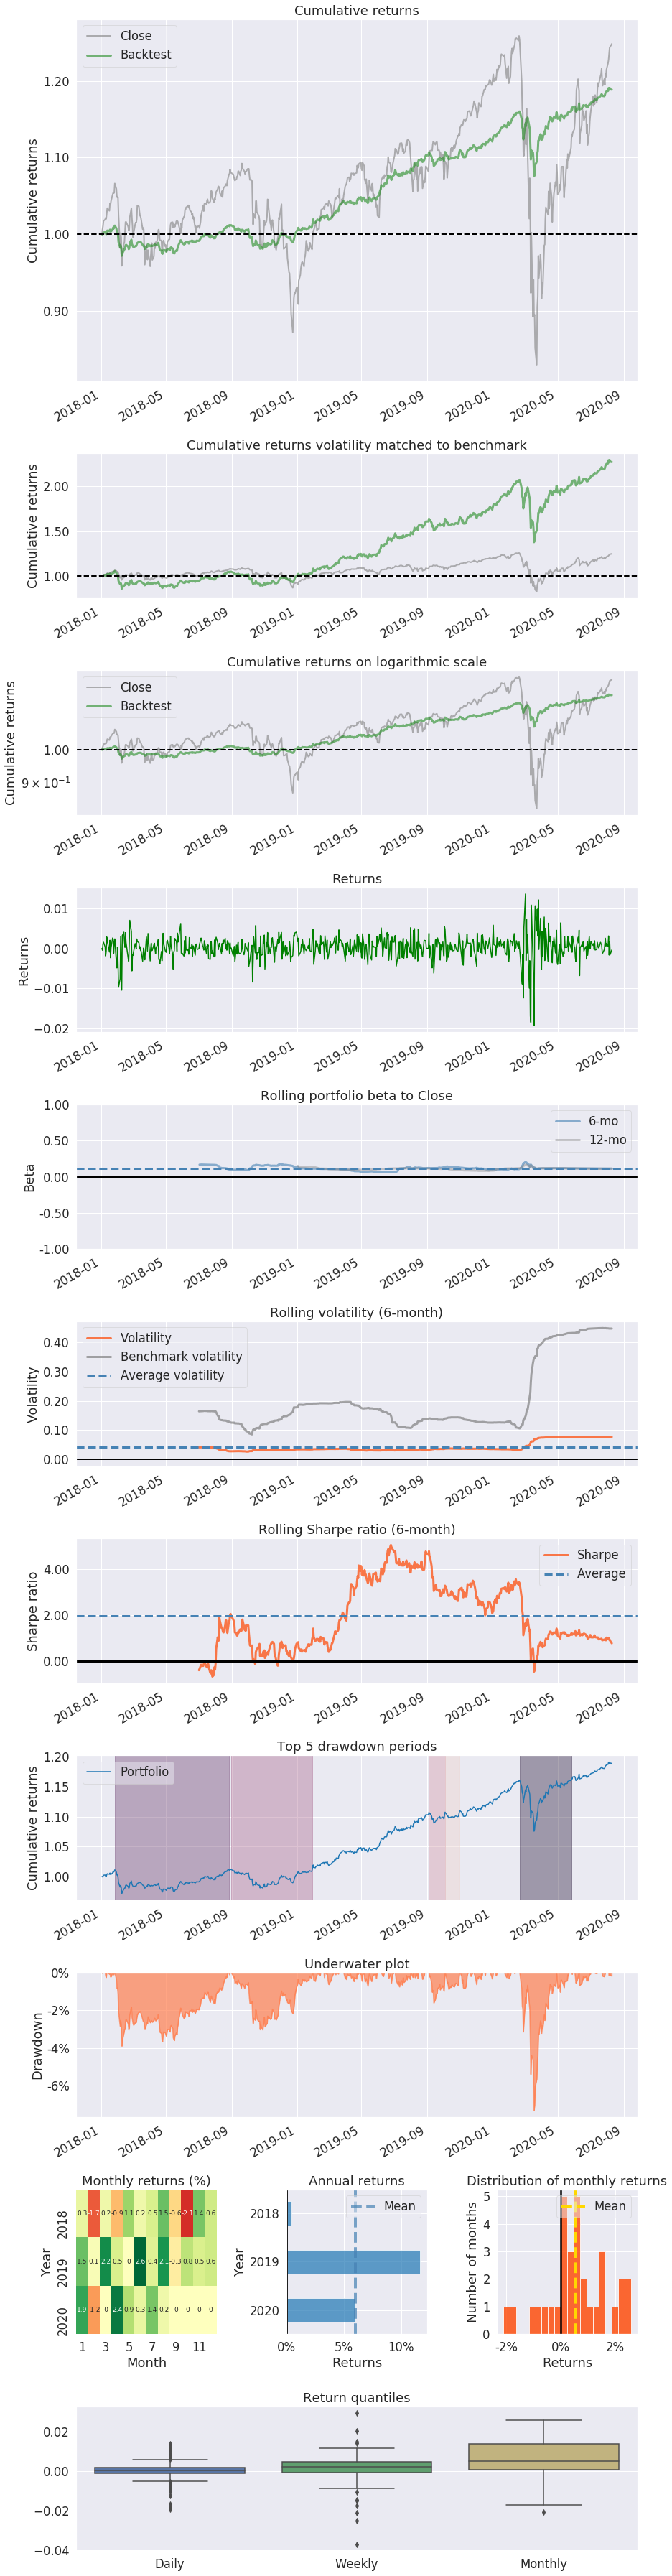

Stress Events,mean,min,max
New Normal,0.03%,-1.93%,1.36%


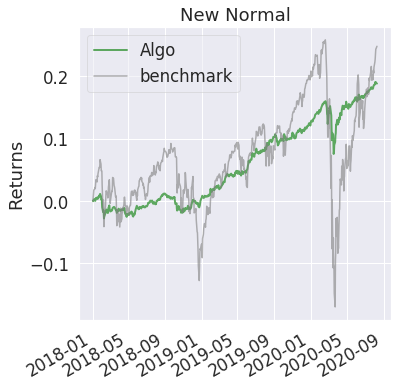

Top 10 long positions of all time,max
sid,
IEF,77.78%
SPY,35.95%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
IEF,77.78%
SPY,35.95%


All positions ever held,max
sid,
IEF,77.78%
SPY,35.95%


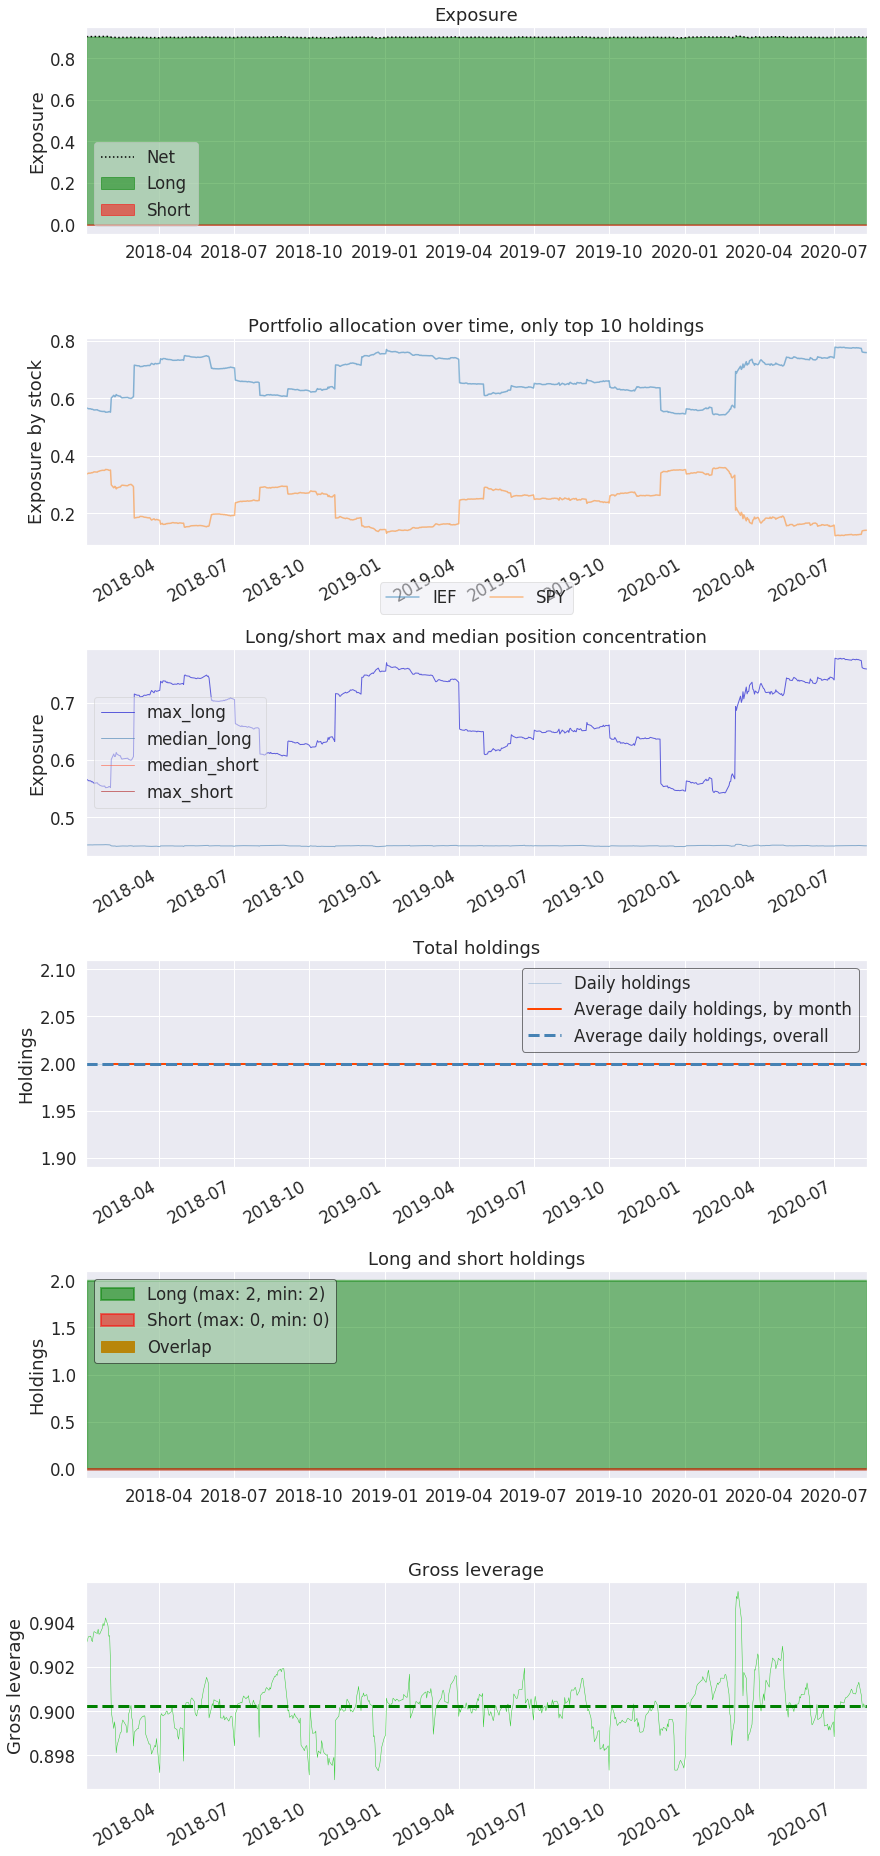

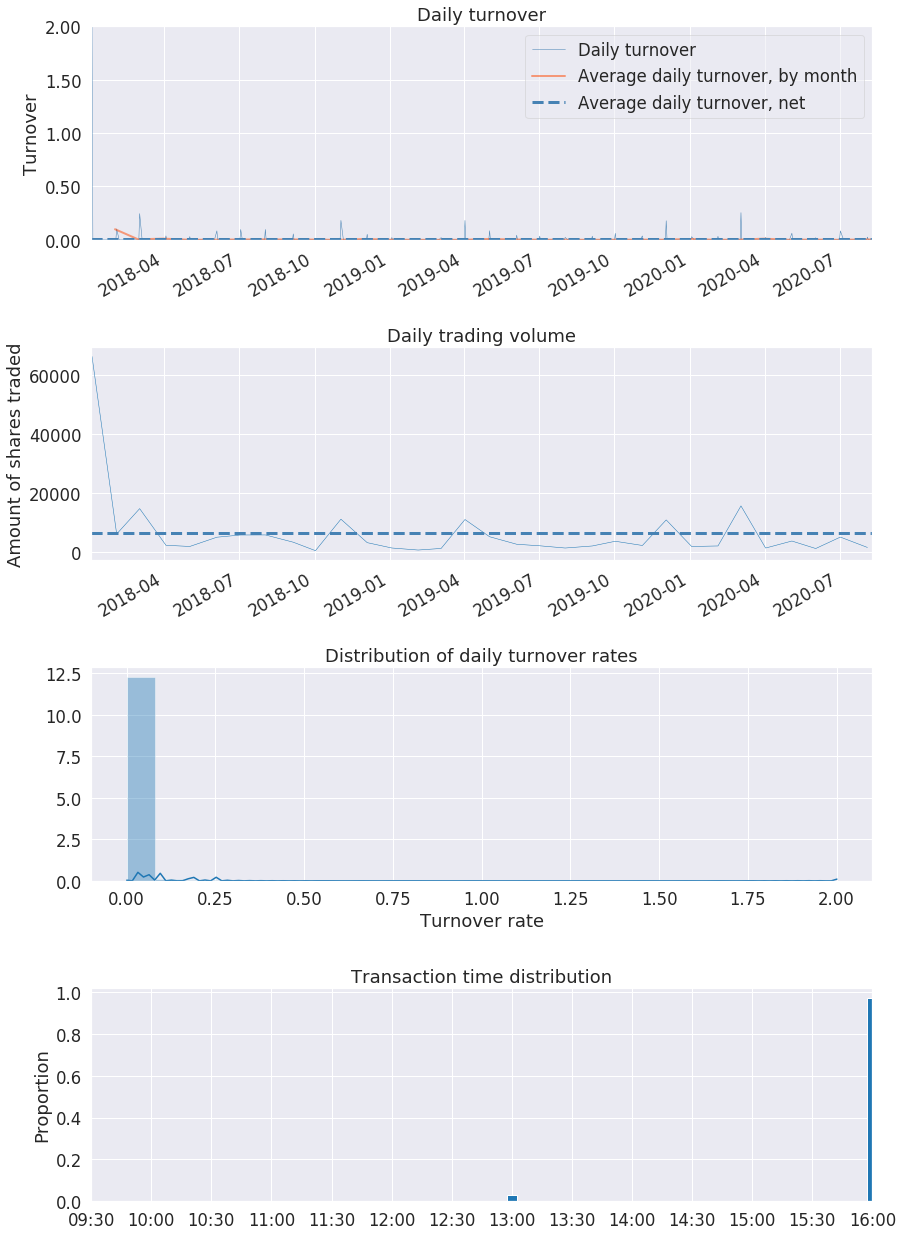

Summary stats,All trades,Long trades
Total number of round_trips,33.00,33.00
Percent profitable,0.58,0.58
Winning round_trips,19.00,19.00
Losing round_trips,14.00,14.00
Even round_trips,0.00,0.00


PnL stats,All trades,Long trades
Total profit,$1416732.42,$1416732.42
Gross profit,$1510926.28,$1510926.28
Gross loss,$-94193.86,$-94193.86
Profit factor,$16.04,$16.04
Avg. trade net profit,$42931.29,$42931.29
Avg. winning trade,$79522.44,$79522.44
Avg. losing trade,$-6728.13,$-6728.13
Ratio Avg. Win:Avg. Loss,$11.82,$11.82
Largest winning trade,$1044654.54,$1044654.54
Largest losing trade,$-16998.00,$-16998.00


Duration stats,All trades,Long trades
Avg duration,415 days 19:36:21.878787,415 days 19:36:21.878787
Median duration,398 days 00:00:00,398 days 00:00:00
Longest duration,949 days 03:00:01,949 days 03:00:01
Shortest duration,30 days 00:00:00,30 days 00:00:00


Return stats,All trades,Long trades
Avg returns all round_trips,0.36%,0.36%
Avg returns winning,0.68%,0.68%
Avg returns losing,-0.07%,-0.07%
Median returns all round_trips,0.05%,0.05%
Median returns winning,0.16%,0.16%
Median returns losing,-0.05%,-0.05%
Largest winning trade,8.78%,8.78%
Largest losing trade,-0.17%,-0.17%


Symbol stats,IEF,SPY
Avg returns all round_trips,0.67%,0.14%
Avg returns winning,1.40%,0.26%
Avg returns losing,-0.07%,-0.06%
Median returns all round_trips,0.02%,0.06%
Median returns winning,0.17%,0.14%
Median returns losing,-0.01%,-0.06%
Largest winning trade,8.78%,1.14%
Largest losing trade,-0.17%,-0.15%


Profitability (PnL / PnL total) per name,
symbol,
IEF,78.49%
SPY,21.51%


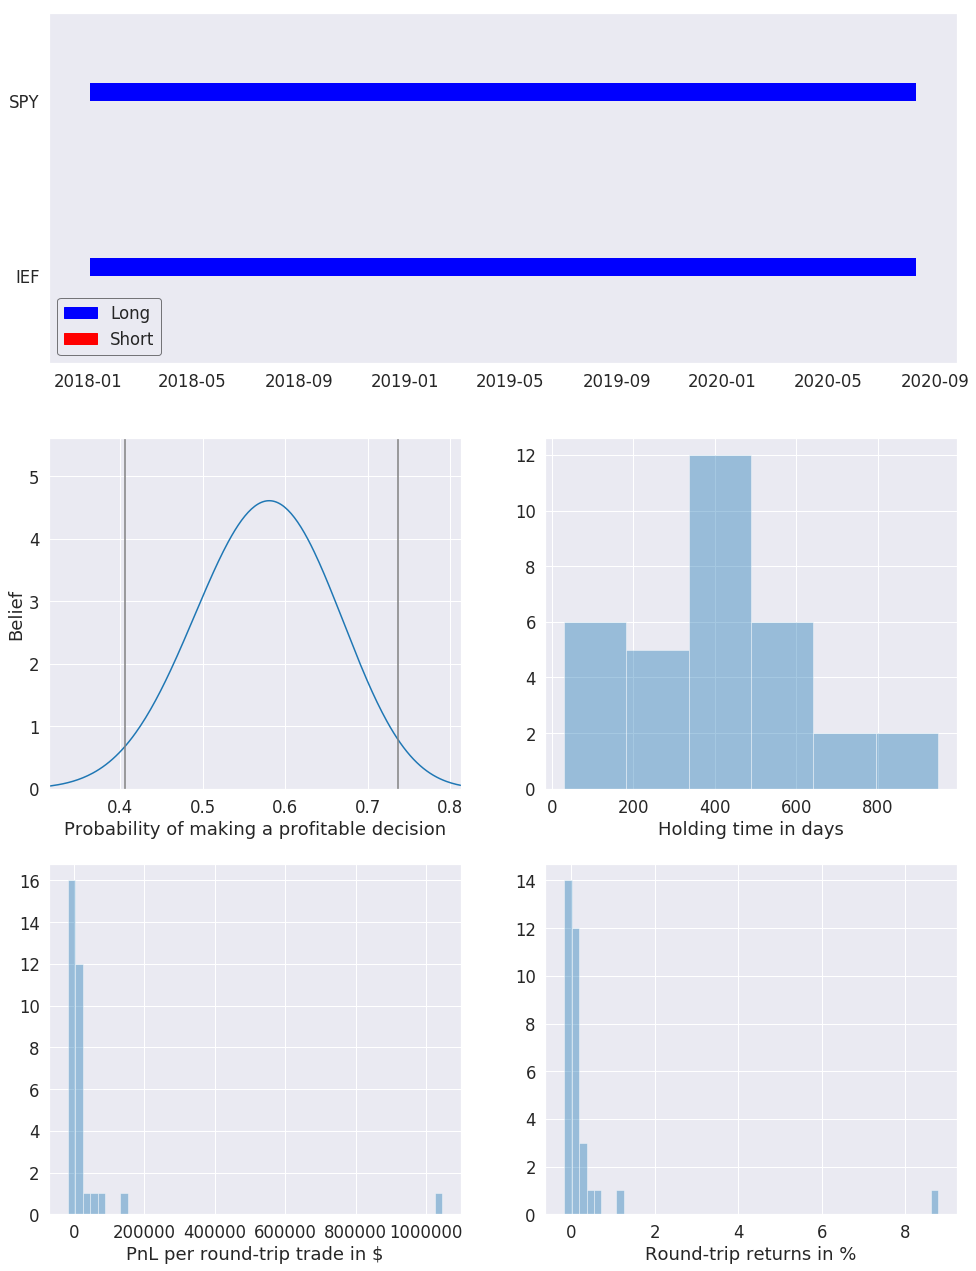

In [87]:
#%%pixie_debugger

from zipline.data import benchmarks
# Set up benchmark Asset 
spy_bm_ret    = benchmarks.get_benchmark_returns(symbol='SPY', first_date=sim_start, last_date=sim_end)
spy_bm_ret    = spy_bm_ret[sim_start:sim_end]
spy_bm_ret[0] = 0.0 # Normalize benchmark returns to start at 0.0.
perf          = perf[sim_start:sim_end]

returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, bootstrap=None,benchmark_rets=spy_bm_ret, round_trips=True)
#pf.create_simple_tear_sheet(returns=returns,positions=positions,transactions=transactions)